In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:

df = pd.read_csv('D:\\DeepLearning\\Author-Attribution\\English_dataset\\Gungor_2018_VictorianAuthorAttribution_data-train.csv', encoding = "ISO-8859-1")
df['author'] = df['author'] -1
# df['text'] =df['text'].str.split()

In [3]:
df.head()

,text,author
0,ou have time to listen i will give you the ent...,0
1,wish for solitude he was twenty years of age a...,0
2,and the skirt blew in perfect freedom about th...,0
3,of san and the rows of shops opposite impresse...,0
4,an hour s walk was as tiresome as three in a s...,0


In [17]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# df['lemmatized'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word,pos='v') for word in x])

# df['text'] = [' '.join(map(str, l)) for l in df['lemmatized']]

In [4]:
df.head()

,text,author
0,ou have time to listen i will give you the ent...,0
1,wish for solitude he was twenty years of age a...,0
2,and the skirt blew in perfect freedom about th...,0
3,of san and the rows of shops opposite impresse...,0
4,an hour s walk was as tiresome as three in a s...,0


In [5]:
import re
df['text']= df['text'].apply(lambda x: x.lower())
df['text']= df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))


In [6]:
df.head()

,text,author
0,ou have time to listen i will give you the ent...,0
1,wish for solitude he was twenty years of age a...,0
2,and the skirt blew in perfect freedom about th...,0
3,of san and the rows of shops opposite impresse...,0
4,an hour s walk was as tiresome as three in a s...,0


In [7]:
X = df['text']
Y = df['author']


In [22]:
# from nltk.corpus import stopwords
# print(stopwords.words('english'))
# vectorizer = CountVectorizer(stop_words=stopwords.words('english'),max_features=1000)
# X = vectorizer.fit_transform(X).toarray()


In [8]:
MAX_FEATURES = 1000
# 

In [9]:
from nltk.corpus import stopwords
vectorizer = TfidfVectorizer(analyzer='word',stop_words=stopwords.words('english'),max_features=MAX_FEATURES)
X = vectorizer.fit_transform(X).toarray()

In [10]:
print(f"Shape of X: {X.shape}")

Shape of X: (53678, 1000)


In [11]:
features = vectorizer.get_feature_names_out()
df_post_processing = pd.DataFrame(X,columns=features).head()
df_post_processing.head()

,aa,able,according,account,acquaintance,across,act,action,added,advantage,...,ye,year,years,yellow,yes,yet,yon,york,young,youth
0,0.0,0.000000,0.0,0.000000,0.000000,0.055227,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.034050,0.000000,0.0,0.112247,0.000000
1,0.0,0.048354,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.04741,0.074913,0.0,0.0,0.061247,0.000000,0.0,0.134603,0.061496
2,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.116900,0.0,0.0,0.031858,0.000000,0.0,0.140030,0.000000
3,0.0,0.000000,0.0,0.047266,0.058499,0.000000,0.0,0.057409,0.045014,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.027987,0.055117,0.0,0.030753,0.000000
4,0.0,0.044180,0.0,0.000000,0.058485,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.030746,0.000000


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
X = np.array(X)
Y = np.array(Y).reshape(-1,1)
X.shape , Y.shape

((53678, 1000), (53678, 1))

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
Y = le.fit_transform(Y)

C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
import numpy as np  

x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=11)

x_train.shape, y_train.shape

((42942, 1000), (42942,))

# Multinomial NB

In [17]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,nb.predict(x_test))}")

Accuracy of the model: 0.761456780923994


# Make hypertuning for MultinomialNB()

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001),
'fit_prior':[True, False]
}

nb = MultinomialNB()
clf = GridSearchCV(nb, param_grid)
clf.fit(x_train,y_train)

print("Best Parameters: ", clf.best_params_)
print("Best Accuracy: {:.2f}".format(clf.best_score_))


Best Parameters:  {'alpha': 0.0001, 'fit_prior': False}
Best Accuracy: 0.80


In [19]:
nb = MultinomialNB(alpha=0.1) # alpha to be lower is better
nb.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,nb.predict(x_test))}")

Accuracy of the model: 0.7697466467958272


In [22]:
nb = MultinomialNB(alpha=0.0001,fit_prior=False) #best result
nb.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,nb.predict(x_test))}")

Accuracy of the model: 0.7939642324888226


making alpha=0.001

In [25]:
nb = MultinomialNB(alpha=0.001)
nb.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,nb.predict(x_test))}")

Accuracy of the model: 0.7705849478390462


# logistic regression

In [26]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,lr.predict(x_test))}")

Accuracy of the model: 0.9142138599105812


# hypertuning for logistic regression

In [37]:
lr = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1],
    'penalty': ['l2','l1','elasticnet']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

Best hyperparameters: {'C': 0.001, 'penalty': 'l2'}


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import ast

# Logistic Regression with elastic net regularization
lr = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1],  # Regularization parameter
    'penalty': [ 'l2', 'elasticnet'],  # Penalty term
    'l1_ratio': [0.2, 0.5, 0.8]  # Elastic net mixing parameter (only used if penalty='elasticnet')
}

# Create the GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

Best hyperparameters: {'C': 0.001, 'l1_ratio': 0.2, 'penalty': 'l2'}


In [62]:
lr = LogisticRegression(solver='saga')
lr.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,lr.predict(x_test))}")

Accuracy of the model: 0.9142138599105812


In [68]:
lr = LogisticRegression(l1_ratio=0.1,penalty='elasticnet',solver='saga',C=0.5) # adds more regularization by choosing smaller value of C (Inverse of regularization strength)
lr.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,lr.predict(x_test))}")

Accuracy of the model: 0.9027570789865872


In [40]:
lr = LogisticRegression(C=0.001,penalty='l2',solver='liblinear')
lr.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,lr.predict(x_test))}")

Accuracy of the model: 0.2271795827123696


# KNeighbors Classifier

In [16]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,knn.predict(x_test))}")

Accuracy of the model: 0.5451751117734724


# Tuning KNN

In [31]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,9,11,15],
               'weights' : ['uniform','distance'],
               'metric' : ['euclidean','manhattan']}

In [32]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=2, n_jobs = -1)


In [33]:
# fit the model on our train set
g_res = gs.fit(x_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


In [34]:
g_res.best_score_

0.5183270457826836

In [35]:
g_res.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,knn.predict(x_test))}")

Accuracy of the model: 0.5690201192250373


In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,knn.predict(x_test))}")

Accuracy of the model: 0.5451751117734724


In [22]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,knn.predict(x_test))}")

Accuracy of the model: 0.5227272727272727


In [23]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,knn.predict(x_test))}")

Accuracy of the model: 0.5012108792846498


In [39]:
knn = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean')
knn.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,knn.predict(x_test))}")

Accuracy of the model: 0.5951005961251863


# RandomForest classifier

In [19]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,rfc.predict(x_test))}")

Accuracy of the model: 0.6153129657228018


# Tuning RandomForest Classifier

In [25]:
rfc = RandomForestClassifier(random_state=0,max_depth=70,n_estimators=400)
rfc.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,rfc.predict(x_test))}")

Accuracy of the model: 0.6331967213114754


In [28]:
rfc = RandomForestClassifier(random_state=0,max_depth=70,n_estimators=400,bootstrap=True,min_samples_leaf=4,min_samples_split=10,)
rfc.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,rfc.predict(x_test))}")

Accuracy of the model: 0.5939828614008942


In [17]:
rfc = RandomForestClassifier(random_state=0,max_depth=80,n_estimators=100,bootstrap=True,min_samples_leaf=5,min_samples_split=12,)
rfc.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,rfc.predict(x_test))}")

Accuracy of the model: 0.5779619970193741


In [27]:
rfc = RandomForestClassifier(random_state=0,criterion='log_loss')
rfc.fit(x_train,y_train)
print(f"Accuracy of the model: {accuracy_score(y_test,rfc.predict(x_test))}")

Accuracy of the model: 0.5560730253353204


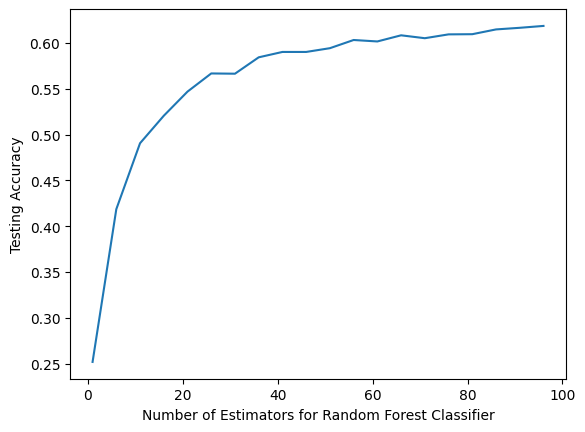

In [18]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Reduce the number of estimators and enable parallel processing
max_estimators = 100
step = 5
estimators_range = range(1, max_estimators + 1, step)

scores = []
for k in estimators_range:
    rfc = RandomForestClassifier(n_estimators=k, n_jobs=-1)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

# plot the relationship between the number of estimators and testing accuracy
plt.plot(estimators_range, scores)
plt.xlabel('Number of Estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')
plt.show()

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score
# pipeline = Pipeline([
#     ('vectorizer', CountVectorizer(ngram_range=(1, 3))),  # Adjust ngram_range for different n-grams
#     ('classifier', LogisticRegression())
# ])


# # Train the model
# x_train = [str(item) for item in x_train]
# x_test = [str(item) for item in x_test]
# pipeline.fit(x_train, y_train)

# # Make predictions
# y_pred = pipeline.predict(x_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)